# All about curves

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import welly
welly.__version__

'0.4.10.dev35+g5a439b6.d20220207'

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well

In [3]:
w = Well.from_las('data/P-129_out.LAS')

Only engine='normal' can read wrapped files


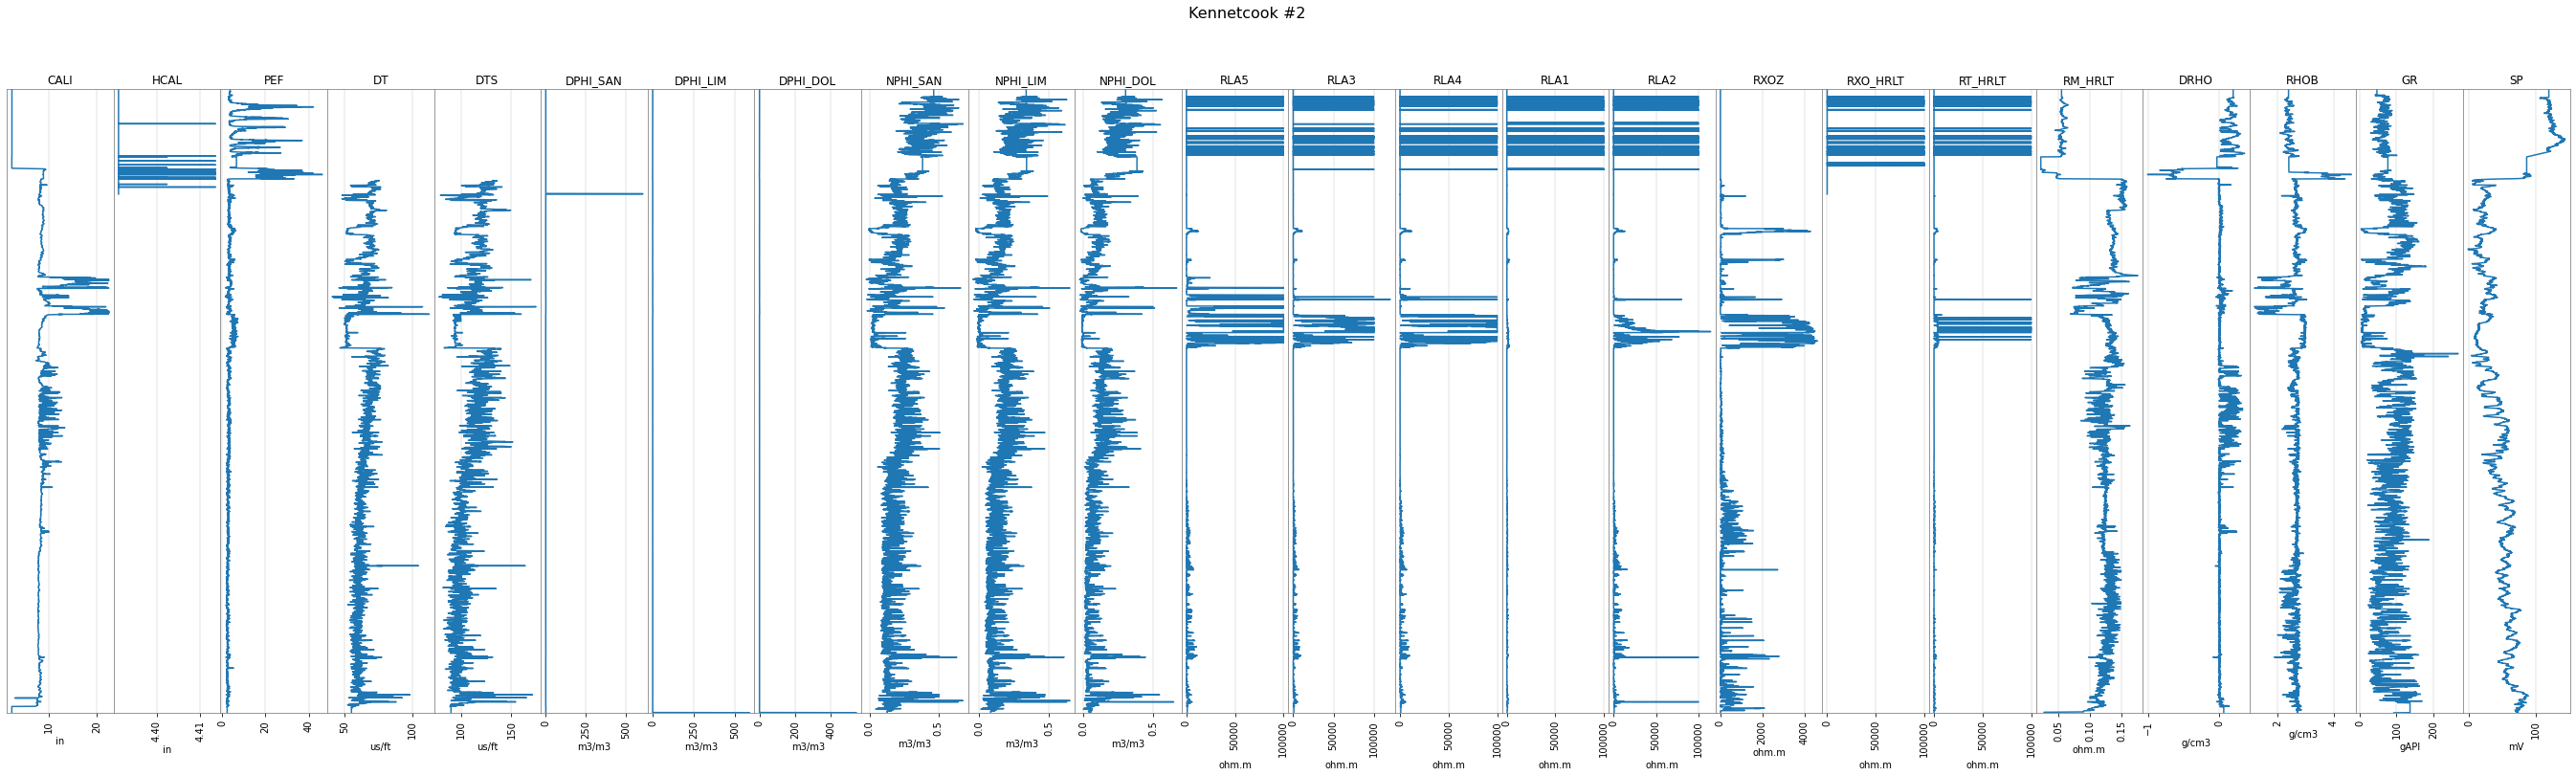

In [4]:
w.plot()

Let's look at one log:

In [5]:
w.data['GR']

Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718])

## Curves

`w.data` is just a dictionary mapping mnemonic to Curve object.

In [6]:
w.data  # Just a dict of data objects.

{'CALI': Curve(mnemonic=CALI, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'HCAL': Curve(mnemonic=HCAL, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[2139]),
 'PEF': Curve(mnemonic=PEF, units=, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DT': Curve(mnemonic=DT, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'DTS': Curve(mnemonic=DTS, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'DPHI_SAN': Curve(mnemonic=DPHI_SAN, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_LIM': Curve(mnemonic=DPHI_LIM, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_DOL': Curve(mnemonic=DPHI_DOL, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'NPHI_SAN': Curve(mnemonic=NPHI_SAN, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'NPHI_LIM': Curve(mnemonic=NPHI_LIM, units=m3/m3, start=1.0668, stop=

## Instantiating a new curve

Let's add a curve from a list of values (`data`) with depths (`basis`):

In [7]:
from welly import Curve

In [8]:
params = {'mnemonic': 'FOO', 'run':0, }
data = [20, 30, 40, 20, 10, 0, 10]
c = Curve(data, index=[2,3,4,5,6,7,8], **params)

<AxesSubplot:title={'center':'FOO'}>

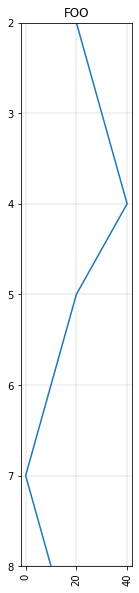

In [9]:
c.plot()

## Limit curves in depth

In [10]:
gr = w.data['GR']

gr

Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718])

In [11]:
gr.to_basis(start=1000, stop=1500)

Curve(mnemonic=GR, units=gAPI, start=1000.0000, stop=1500.0000, step=0.1524, count=[3282])

We can do this to all the curves in a well — **this will overwrite all the curves; give them a new name if you don't want that to happen!**

In [12]:
for mnemonic, curve in w.data.items():
    w.data[mnemonic] = curve.to_basis(start=1000, stop=1500)

Now save to a new LAS file:

In [13]:
w.to_las('data/P-129_1000-1500.las')

In [14]:
!head -10 P-129_1000-1500.las

head: cannot open 'P-129_1000-1500.las' for reading: No such file or directory


## Another way to do it

In [15]:
# Reload the file so we have all the data as before.
w = Well.from_las('data/P-129_out.LAS')

Only engine='normal' can read wrapped files


In [16]:
# WARNING: This works in place and overwrites the logs.
w.unify_basis(start=1000, stop=1500)

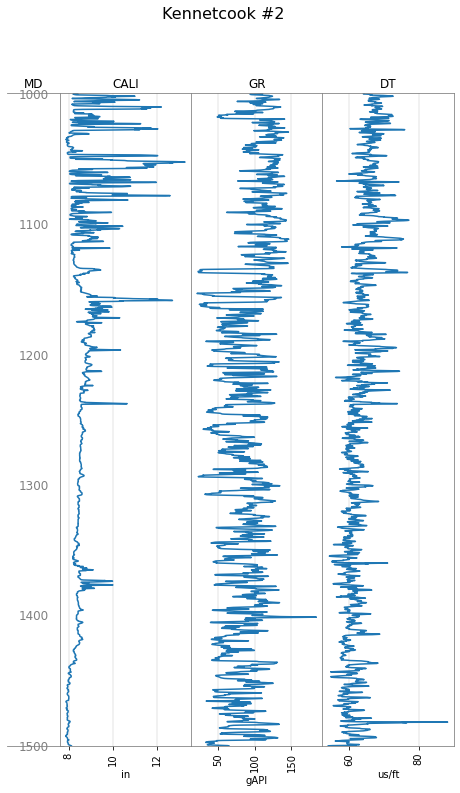

In [17]:
w.plot(tracks=['MD', 'CALI', 'GR', 'DT'])

## Curve info

In [18]:
# Reload the file so we have all the data as before.
w = Well.from_las('data/P-129_out.LAS')

Only engine='normal' can read wrapped files


In Jupyter Notebook, the `__repr__()` is a little table summarizing the curve data...

In [19]:
gr = w.data['GR']
gr

Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718])

In [20]:
gr.read_at(168.7068)

72.293632507

In [21]:
gr.basis

array([1.0668000e+00, 1.2192000e+00, 1.3716000e+00, ..., 1.9388328e+03,
       1.9389852e+03, 1.9391376e+03])

In [22]:
gr[1000:1010]

Curve(mnemonic=GR, units=gAPI, start=1000.0488, stop=1009.9548, step=0.1524, count=[66])

`Curve` objects are just `ndarray`s, so we get lots of things for free...

In [23]:
gr.describe()  # Equivalent to get_stats()

,GR
count,12718.0000000000
mean,78.9863535888
std,37.0719153332
min,3.8940699100
25%,51.3325605393
50%,76.5569686890
75%,109.8330020900
max,267.9404296900


In [24]:
gr.get_stats()

{'samples': 12718,
 'nulls': 0,
 'mean': 78.9863535887685,
 'min': 3.89406991,
 'max': 267.94042969}

In [25]:
m = np.mean(gr)

/home/matt/miniconda3/envs/welly/lib/python3.9/site-packages/welly/curve.py:412: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return self.df.mean(axis=axis, **kwargs)


In [26]:
m  # Not really sure why this is a Curve

GR    78.9863535888
dtype: float64

In [27]:
gr.mnemonic

'GR'

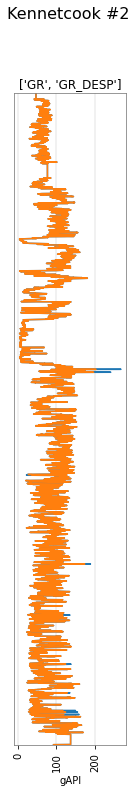

In [28]:
w.data['GR_DESP'] = gr.despike(window_length=50, z=2)
w.plot(tracks = [['GR', 'GR_DESP']])

## Slicing

It's usually better to get a subset of the data with `to_basis()` (see below, _Getting a segment of the data_). But you can slice with indices too:

In [29]:
gr.start, gr.stop

(1.0668, 1939.1376)

In [30]:
g = gr[1000:1020]

In [31]:
g.basis

array([1000.0488, 1000.2012, 1000.3536, 1000.506 , 1000.6584, 1000.8108,
       1000.9632, 1001.1156, 1001.268 , 1001.4204, 1001.5728, 1001.7252,
       1001.8776, 1002.03  , 1002.1824, 1002.3348, 1002.4872, 1002.6396,
       1002.792 , 1002.9444, 1003.0968, 1003.2492, 1003.4016, 1003.554 ,
       1003.7064, 1003.8588, 1004.0112, 1004.1636, 1004.316 , 1004.4684,
       1004.6208, 1004.7732, 1004.9256, 1005.078 , 1005.2304, 1005.3828,
       1005.5352, 1005.6876, 1005.84  , 1005.9924, 1006.1448, 1006.2972,
       1006.4496, 1006.602 , 1006.7544, 1006.9068, 1007.0592, 1007.2116,
       1007.364 , 1007.5164, 1007.6688, 1007.8212, 1007.9736, 1008.126 ,
       1008.2784, 1008.4308, 1008.5832, 1008.7356, 1008.888 , 1009.0404,
       1009.1928, 1009.3452, 1009.4976, 1009.65  , 1009.8024, 1009.9548,
       1010.1072, 1010.2596, 1010.412 , 1010.5644, 1010.7168, 1010.8692,
       1011.0216, 1011.174 , 1011.3264, 1011.4788, 1011.6312, 1011.7836,
       1011.936 , 1012.0884, 1012.2408, 1012.3932, 

Notice that the basis is updated to match the data retrieved by the slice.

## Plotting and reading

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

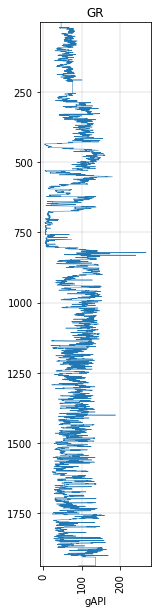

In [36]:
gr.plot(lw=0.5)

There's also an experimental 'imshow'-style 2D plot.

<AxesSubplot:>

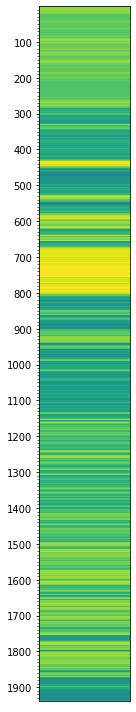

In [37]:
gr.plot_2d(cmap='viridis_r')

(0.0, 200.0)

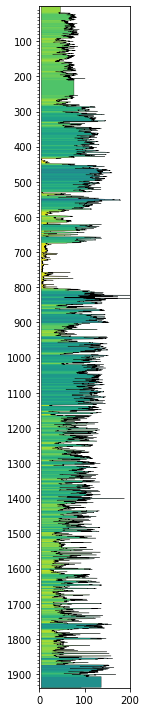

In [46]:
gr.plot_2d(cmap='viridis_r', curve=True, lw=0.3, edgecolor='k')
plt.xlim(0,200)

## Interpolated values

You can get values from anywhere on the log:

In [47]:
gr.step

0.1524000000000001

In [48]:
gr.read_at(1001)

97.99112340886289

In [49]:
gr.read_at([1001, 1003, 1004])

[97.99112340886289, 116.81626549853009, 104.14886540398906]

## Despike

You can despike with a window length for the trend and a Z-score to clip at — the curve is compared to the median *in the window* using the standard deviation *from the entire curve*. Here's the difference:

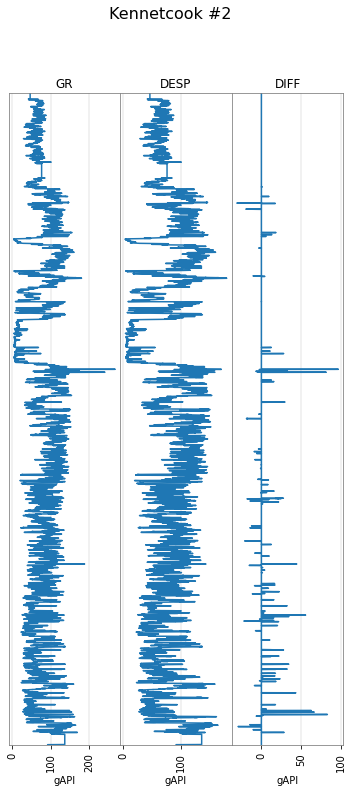

In [50]:
w.data['DESP'] = gr.despike(z=1)
w.data['DIFF'] = gr - w.data['DESP']
w.plot(tracks=['GR', 'DESP', 'DIFF'])

## Changing basis

You can easily upscale a bit by changing the step:

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

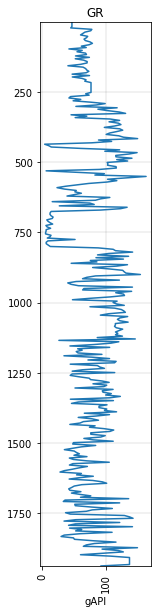

In [51]:
gr.to_basis(step=5).plot()

Or take out a segment of the log:

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

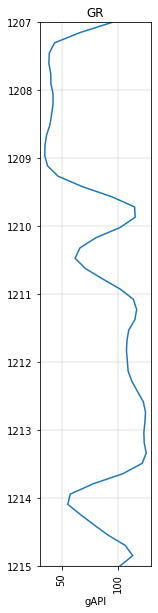

In [52]:
newb = gr.to_basis(start=1207, stop=1215)
newb.plot()

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

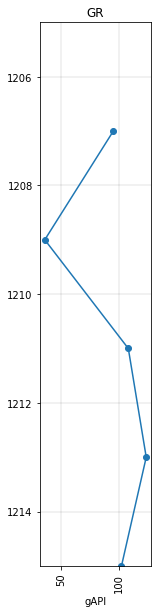

In [53]:
silly = newb.to_basis(start=1205, step=2)
silly.plot(marker='o')

# Curve starts at 1207 m (see above); does not extrapolate.

<AxesSubplot:title={'center':'DT'}, xlabel='us/ft'>

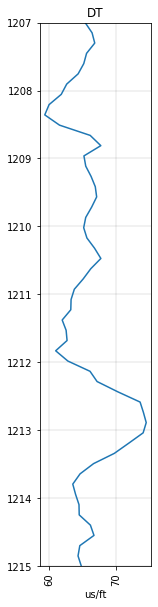

In [54]:
dt = w.data['DT']
dt.to_basis_like(newb.basis).plot()

## Getting a segment of the data

In [55]:
segment = gr.to_basis(start=600, stop=680)

In [56]:
segment.basis[-1]

680.0

Text(0.5, 0, '')

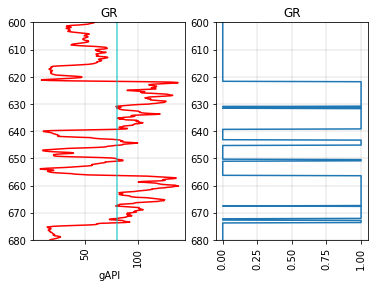

In [57]:
fig, axs = plt.subplots(ncols=2)

segment.plot(ax=axs[0], c='r')
axs[0].axvline(80, c='c', alpha=0.7)
segment.block(cutoffs=80).plot(ax=axs[1])
axs[1].set_xlabel('')

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

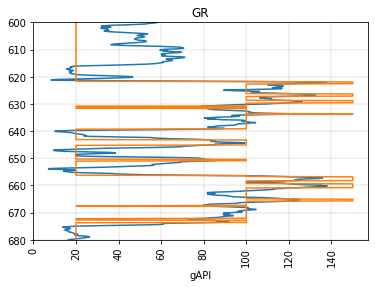

In [58]:
fig, ax = plt.subplots()

segment.plot(ax=ax)
segment.block(cutoffs=(80, 120), values=(20, 100, 150)).plot(ax=ax)

You can use a cutoff of, say, 120 API, then reassign the output values to whatever you like:

<AxesSubplot:title={'center':'GR'}, xlabel='gAPI'>

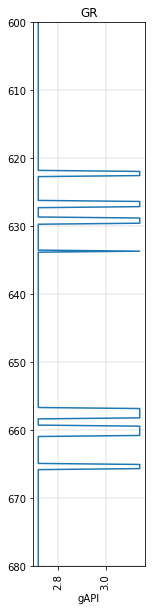

In [59]:
segment.block(cutoffs=120, values=(2.718, 3.142)).plot()

You can send a function in to determine replacement values from the original log. E.g., to replace the values with the block means:

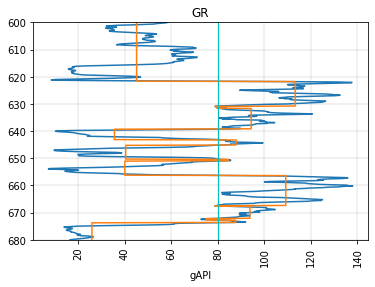

In [60]:
fig, ax = plt.subplots()

segment.plot(ax=ax)
segment.block(cutoffs=80, function=np.mean).plot(ax=ax)
plt.axvline(80, color='c', lw=1)

---

&copy; 2022 Agile Scientific, CC BY